# Assignment - Deep Neural Network - Classification

In this assignment, you will focus on housing. The data set (housing.csv) includes information about houses in each district in California. Predict the ocean proximity (`ocean_proximity` column) in the data set. This column determines whether the district is inland, near ocean, etc. This is a multi-class classification task. 

**The unit of analysis is a DISTRICT**



## Goal

Use the **housing.csv** data set and build the below models to predict **ocean_proximity**. 

## Submission:

Please save and submit this Jupyter notebook file. The correctness of the code is important. **Readability and organization of your code is also important.** Do not submit unreadable/undecipherable code. You may want to use markdown cells to create sections, and use comments where necessary.


# Read and Prepare the Data

In [ ]:
# Insert as many cells as you need

In [210]:
# Importing imp Libraries
import numpy as np
import os
import pandas as pd
import tensorflow as tf

In [211]:
# Loading and Checking Data 
housing_df = pd.read_csv("/housing.csv")
housing_df.head(3)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,NEAR BAY


In [212]:
# Checking Data to find out any null values are present or not
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  int64  
 9   ocean_proximity     20635 non-null  object 
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


In [213]:
# here I am Droping the missing values. We found misssing values in total_bedroom and ocen_proximity

# I am droping blank records as I don't want to introduce bias in data by replacing it by median(numerical) and mode(catagorical). 
housing_df.dropna(axis=0, inplace=True)

# Now I am reseting the index
housing_df.reset_index(inplace=True, drop=True)


housing_df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20428.000000,20428.000000,20428.000000,20428.000000,20428.000000,20428.000000,20428.000000,20428.000000,20428.000000
mean,-119.570986,35.633778,28.629724,2636.764147,537.899305,1425.132220,499.488007,3.871437,206821.928432
std,2.003732,2.136312,12.590156,2185.451409,421.425970,1133.277418,382.326831,1.899432,115412.337452
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1450.000000,296.000000,788.000000,280.000000,2.563400,119475.000000
50%,-118.500000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.537500,179700.000000
75%,-118.010000,37.720000,37.000000,3143.250000,647.000000,1723.000000,604.000000,4.744075,264700.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


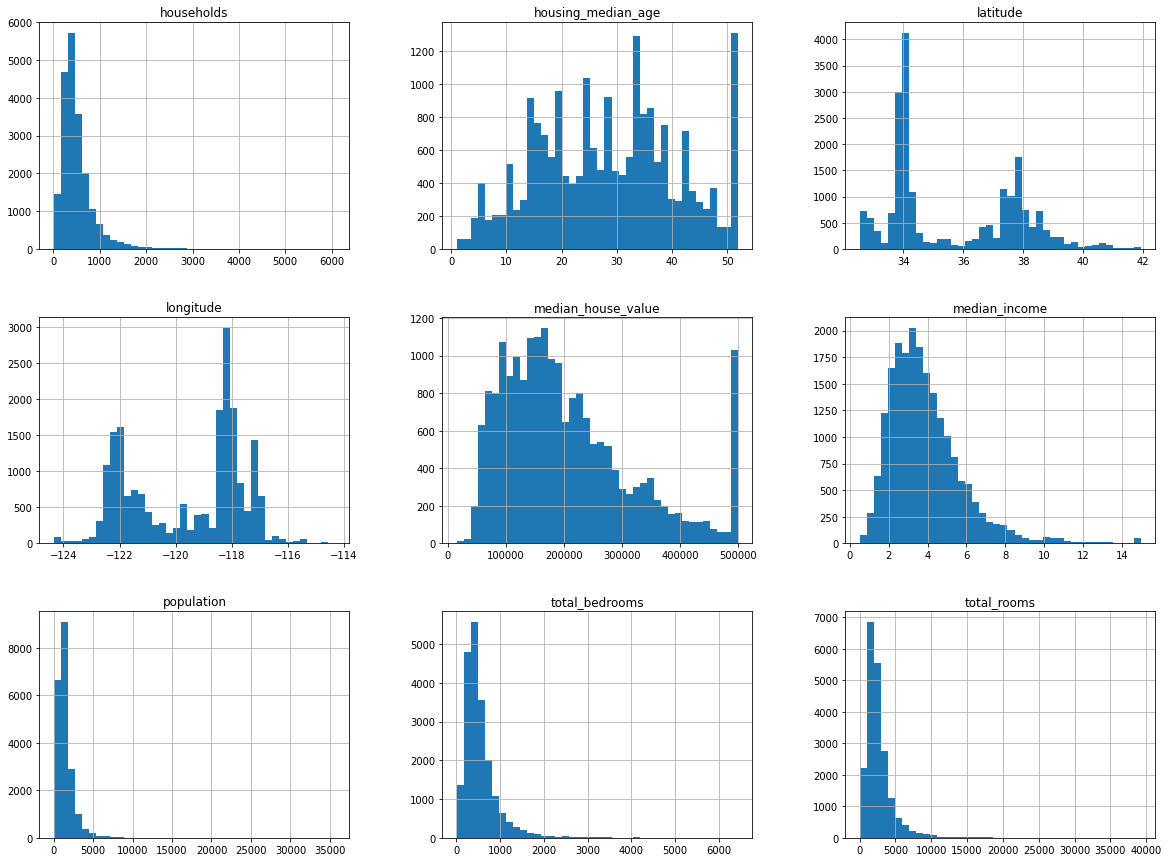

In [214]:
# now we will check the distribution of every numeric veriable by checking histogram.

import matplotlib.pyplot as plt

%matplotlib inline

housing_df.hist(bins=40, figsize=(20,15))

plt.show()

In [ ]:
# Q.2 Transform Variables

In [215]:
# Checking correlation

corr_matrix = housing_df.corr()

corr_matrix["total_rooms"].sort_values(ascending=False)

total_rooms           1.000000
total_bedrooms        0.930382
households            0.918987
population            0.857273
median_income         0.197822
median_house_value    0.133516
longitude             0.045555
latitude             -0.036799
housing_median_age   -0.360634
Name: total_rooms, dtype: float64

In [216]:
# As we can see the Collinearity between total rooms and total_bedrooms,households and population is more thn 0.85.
# So we need to remove this multi-Collinearity and add some useful columns.
# We have feature called total_rooms and total_bedrooms which are basically total number of rooms and bedrooms in that. 
# These features are not useful to us unless we convert them into total numbers of rooms and bedrooms per household. 
# We will also create a new variable called population per household using population variable.

housing_df["rooms_per_household"] = housing_df["total_rooms"]/housing_df["households"]
housing_df["population_per_household"]=housing_df["population"]/housing_df["households"]
housing_df["bedrooms_per_room"] = housing_df["total_bedrooms"]/housing_df["total_rooms"]

housing_df.head(3)

# Now I have added three derived field by using other fields.

# Now I will check the distribution of all the feilds.


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,population_per_household,bedrooms_per_room
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY,6.984127,2.555556,0.146591
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY,6.238137,2.109842,0.155797
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,NEAR BAY,8.288136,2.802260,0.129516


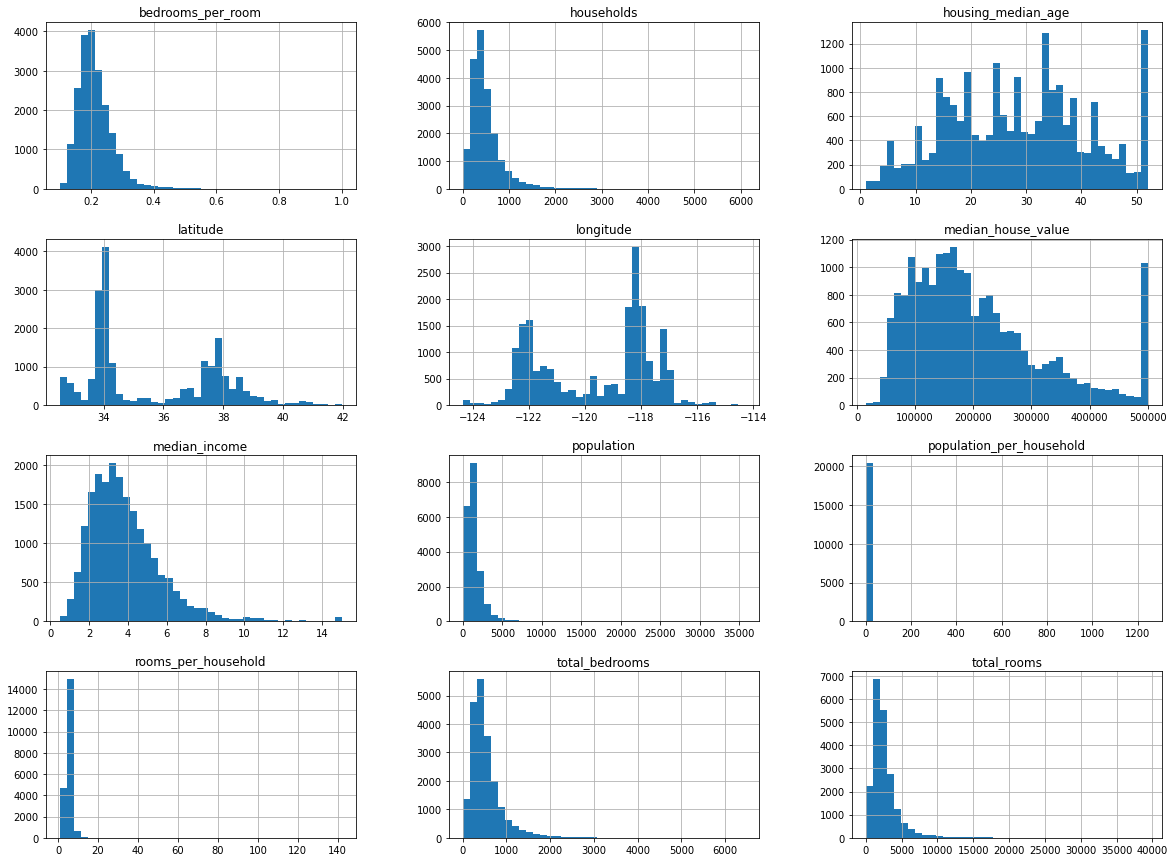

In [217]:
import matplotlib.pyplot as plt

%matplotlib inline

housing_df.hist(bins=40, figsize=(20,15))

plt.show()

In [218]:
# Now we can see the that there are skewed distribution in  median_house_value.

# So we will convert it to normal distribution by taking log transformation.


housing_df['median_house_value'] = np.log(housing_df["median_house_value"])

# Checking data 
housing_df.head(3)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,population_per_household,bedrooms_per_room
0,-122.23,37.88,41,880,129.0,322,126,8.3252,13.022764,NEAR BAY,6.984127,2.555556,0.146591
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,12.789684,NEAR BAY,6.238137,2.109842,0.155797
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,12.771671,NEAR BAY,8.288136,2.802260,0.129516


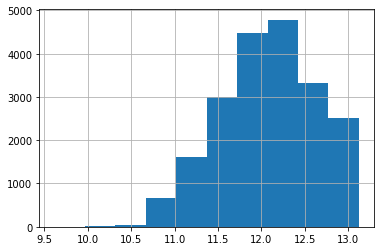

In [219]:
housing_df["median_house_value"].hist()

plt.show()

# Distribution is still somewhat skewed distribution but still we can use it as it is better as compared to previous one. 

In [220]:
housing_df = housing_df.drop(['total_rooms', 'total_bedrooms', 'households'], axis =1)

housing_df.head()

,longitude,latitude,housing_median_age,population,median_income,median_house_value,ocean_proximity,rooms_per_household,population_per_household,bedrooms_per_room
0,-122.23,37.88,41,322,8.3252,13.022764,NEAR BAY,6.984127,2.555556,0.146591
1,-122.22,37.86,21,2401,8.3014,12.789684,NEAR BAY,6.238137,2.109842,0.155797
2,-122.24,37.85,52,496,7.2574,12.771671,NEAR BAY,8.288136,2.802260,0.129516
3,-122.25,37.85,52,558,5.6431,12.740517,NEAR BAY,5.817352,2.547945,0.184458
4,-122.25,37.85,52,565,3.8462,12.743151,NEAR BAY,6.281853,2.181467,0.172096


In [221]:
# Now I am  preparing it for machine learning algorithm

# I have dropped the columns ('total rooms, total bedrooms, 'population')

#I am  setting the training and test data sets
housing_Tr = housing_df.drop("ocean_proximity", axis=1) # drop labels # Train dataset

#Select the label
housing_Te = housing_df[["ocean_proximity"]] # Test Dataset

# Checking Dataset
housing_Tr.head(3)
housing_Te.head(3)

# Checking info
housing_Tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20428 entries, 0 to 20427
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   longitude                 20428 non-null  float64
 1   latitude                  20428 non-null  float64
 2   housing_median_age        20428 non-null  int64  
 3   population                20428 non-null  int64  
 4   median_income             20428 non-null  float64
 5   median_house_value        20428 non-null  float64
 6   rooms_per_household       20428 non-null  float64
 7   population_per_household  20428 non-null  float64
 8   bedrooms_per_room         20428 non-null  float64
dtypes: float64(7), int64(2)
memory usage: 1.4 MB


In [222]:
# now I am Converting it  back to a dataframe
housing_Tr_df = pd.DataFrame(housing_Tr, columns=housing_Tr.columns)

housing_Tr_df.head(3)

,longitude,latitude,housing_median_age,population,median_income,median_house_value,rooms_per_household,population_per_household,bedrooms_per_room
0,-122.23,37.88,41,322,8.3252,13.022764,6.984127,2.555556,0.146591
1,-122.22,37.86,21,2401,8.3014,12.789684,6.238137,2.109842,0.155797
2,-122.24,37.85,52,496,7.2574,12.771671,8.288136,2.802260,0.129516


In [234]:
# Now here we are preparing data for machin learning.

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

housing_Tr_std = scaler.fit_transform(housing_Tr) 

# Standardize features by removing the mean and scaling to unit variance



In [235]:
housing_Tr_std # Now data without the target veriable is converted into the std format see the ranges of each col.

array([[-1.32706278,  1.05147394,  0.98255961, ...,  0.62535586,
        -0.04944264, -1.14581214],
       [-1.32207197,  1.04211178, -0.60602193, ...,  0.32493231,
        -0.09213845, -0.98703634],
       [-1.33205359,  1.0374307 ,  1.85627946, ...,  1.15050359,
        -0.02581034, -1.4403128 ],
       ...,
       [-0.82299112,  1.77704101, -0.92373824, ..., -0.09091201,
        -0.07146718,  0.03706389],
       [-0.8728992 ,  1.77704101, -0.84430916, ..., -0.04098699,
        -0.09085796,  0.11846297],
       [-0.83297273,  1.74895454, -1.00316731, ..., -0.07110865,
        -0.04355856,  0.14075454]])

In [236]:
# In Tensorflow Lebels should be in interger format so I am convertig it into integer with help of Ordinal encoding.

from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()

housing_labels_ord = ordinal_encoder.fit_transform(housing_Te)

housing_labels_ord[:10]

# We have converted it into int.

array([[2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.]])

In [237]:

housing_labels_ord.dtype

# Data type is float. It needs to be integer

dtype('float64')

In [238]:
#Converting data type to integer so we can use it model

housing_labels_int = housing_labels_ord.astype(int)

housing_labels_int.dtype

dtype('int64')

In [239]:
#We need to convert this to a 1-D array using RAVEL

housing_labels_int_1d = np.ravel(housing_labels_int)

housing_labels_int_1d

array([2, 2, 2, ..., 1, 1, 1])

# DNNClassifier model

Use Tensorflow's DNNClassifier to predict the target variable. You can try deep networks.

In [240]:
# install pip in the virtual environment
!pip install tensorflow

In [242]:
from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(housing_Tr_df, housing_labels_int_1d, test_size=0.3) 

# Here  I am doing 70-30 split (train 70% and test 30%)

In [248]:
# Now I am Creating feature columns
# TensorFlow needs "feature columns" as a bridge between the data and the estimator. These involve columns names and data types only

longitude1= tf.feature_column.numeric_column('longitude')
latitude1= tf.feature_column.numeric_column('latitude')
housing_median_age1= tf.feature_column.numeric_column('housing_median_age')
rooms_per_household1= tf.feature_column.numeric_column('rooms_per_household')
bedrooms_per_room1= tf.feature_column.numeric_column('bedrooms_per_room')
population_per_household1= tf.feature_column.numeric_column('population_per_household')
population1= tf.feature_column.numeric_column('population')
median_income1= tf.feature_column.numeric_column('median_income')
median_house_value1= tf.feature_column.numeric_column('median_house_value')

feat_columns = [longitude1, 
                latitude1,
               housing_median_age1,
              rooms_per_household1,
              bedrooms_per_room1,
             population_per_household1,
               population1,
               median_income1,
               median_house_value1
               ]



In [249]:
feat_columns


[NumericColumn(key='longitude', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='latitude', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='housing_median_age', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='rooms_per_household', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='bedrooms_per_room', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='population_per_household', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='population', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='median_income', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='median_house_value', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None)]

In [277]:
# Now I am Defining the model


tf.compat.v1.reset_default_graph()


dnn_clf = tf.estimator.DNNClassifier(hidden_units=[50, 25, 15], 
                                     n_classes=4, 
                                     feature_columns=feat_columns) 


INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmp0dc1gsiv', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [278]:
#Read data from tensor into memory

def training_input_fn ():
    dataset = tf.data.Dataset.from_tensor_slices((dict(train_x), train_y))
    dataset = dataset.shuffle(500).repeat().batch(100)
    dataset_iterator = tf.compat.v1.data.make_one_shot_iterator(dataset)   
    return dataset_iterator.get_next()


# create testing input function
def valid_input_fn ():
    dataset = tf.data.Dataset.from_tensor_slices((dict(test_x), test_y))
    dataset = dataset.batch(100)
    dataset_iterator = tf.compat.v1.data.make_one_shot_iterator(dataset)   
    return dataset_iterator.get_next()

In [281]:
#Train the model

dnn_clf.train(input_fn = lambda:training_input_fn(),steps=100000)

INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmp0dc1gsiv/model.ckpt-1000
Instructions for updating:
Use standard file utilities to get mtimes.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 1000...
INFO:tensorflow:Saving checkpoints for 1000 into

In [282]:
#Evaluate the model

dnn_clf.evaluate(input_fn = lambda:valid_input_fn())

INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-07-10T01:38:51Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmp0dc1gsiv/model.ckpt-101000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Inference Time : 0.35129s
INFO:tensorflow:Finished evaluation at 2020-07-10-01:38:52
INFO:tensorflow:Saving dict for global step 101000: accuracy = 0.6581824, ave

{'accuracy': 0.6581824,
 'average_loss': 0.95000786,
 'global_step': 101000,
 'loss': 0.9513463}

In [283]:
# Classification Matrix

y_train_pred = list(dnn_clf.predict(input_fn = valid_input_fn))

INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmp0dc1gsiv/model.ckpt-101000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [284]:
#y_train_pred is a dictionary. We only need the "classes" from it

y_train_pred

predictions = [p['class_ids'][0] for p in y_train_pred]

In [285]:
confusion_matrix = tf.math.confusion_matrix(list(test_y), predictions)


In [286]:
confusion_matrix

<tf.Tensor: shape=(4, 4), dtype=int32, numpy=
array([[2420,  230,   13,    0],
       [ 477, 1442,   52,    0],
       [ 305,  236,  172,    0],
       [ 677,   91,   14,    0]], dtype=int32)>

In [289]:
from sklearn.metrics import classification_report

print(classification_report(test_y, predictions))

              precision    recall  f1-score   support

           0       0.62      0.91      0.74      2663
           1       0.72      0.73      0.73      1971
           2       0.69      0.24      0.36       713
           3       0.00      0.00      0.00       782

    accuracy                           0.66      6129
   macro avg       0.51      0.47      0.46      6129
weighted avg       0.58      0.66      0.60      6129



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Keras DNN model

Use Tensorflow's Keras library to predict the same target variable. 

In [290]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

# fix random seed for reproducibility
np.random.seed(42)

In [291]:
#Define the model: for multi-class

model = Sequential()

model.add(Dense(60, input_dim=9, activation='relu'))
model.add(Dense(35, activation='relu'))
model.add(Dense(20, activation='relu'))

#final layer: there has to be 4 nodes with softmax (because we have 4 categories)
model.add(Dense(4, activation='softmax'))

In [292]:
# Compile model

#Optimizer:
sgd = keras.optimizers.SGD(lr=0.08)


# we have to use "categorical_crossentropy" for mutli-class
#but since our target is ordinal, we need to use "sparse_..."
#if it is binary classification, then use binary_crossentropy

model.compile(loss='sparse_categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

In [293]:
# now i am  Fiting the model

model.fit(train_x, train_y, epochs=200, batch_size=200)

Epoch 1/200
14299/14299 [==============================] - 0s 12us/step - loss: nan - accuracy: 0.4399
Epoch 2/200
14299/14299 [==============================] - 0s 8us/step - loss: nan - accuracy: 0.4456
Epoch 3/200
14299/14299 [==============================] - 0s 8us/step - loss: nan - accuracy: 0.4456
Epoch 4/200
14299/14299 [==============================] - 0s 9us/step - loss: nan - accuracy: 0.4456
Epoch 5/200
14299/14299 [==============================] - 0s 8us/step - loss: nan - accuracy: 0.4456
Epoch 6/200
14299/14299 [==============================] - 0s 8us/step - loss: nan - accuracy: 0.4456
Epoch 7/200
14299/14299 [==============================] - 0s 8us/step - loss: nan - accuracy: 0.4456
Epoch 8/200
14299/14299 [==============================] - 0s 8us/step - loss: nan - accuracy: 0.4456
Epoch 9/200
14299/14299 [==============================] - 0s 8us/step - loss: nan - accuracy: 0.4456
Epoch 10/200
14299/14299 [==============================] - 0s 8us/step - loss: n

In [294]:
# evaluate the model

scores = model.evaluate(test_x, test_y)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

6129/6129 [==============================] - 0s 25us/step

accuracy: 43.45%


# MLPClassifier (for comparison purposes)

Use the MLPClassifier from the Sci-kit Learn library and predict the same target variable.

In [295]:
# Common imports
import numpy as np
import pandas as pd

In [309]:
from sklearn.neural_network import MLPClassifier

#Default settings create 1 hidden layer with 100 neurons
#look at MLPClassifier documentation in sklearn to see which parameters can be modified
mlp_clf = MLPClassifier(hidden_layer_sizes=(110,))

mlp_clf.fit(train_x, train_y)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(110,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [310]:
mlp_clf = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, verbose=True)

mlp_clf.fit(train_x, train_y)

# default loss function is cross-entropy or log-loss 
# classifier predicts a probability (0-1), while the actual is 0 or 1 see doc below
# https://ml-cheatsheet.readthedocs.io/en/latest/loss_functions.html

Iteration 1, loss = inf
Iteration 2, loss = 1.53434469
Iteration 3, loss = 1.62188265
Iteration 4, loss = 1.43725504
Iteration 5, loss = 1.38985673
Iteration 6, loss = 1.71615853
Iteration 7, loss = 1.81381181
Iteration 8, loss = 1.74515935
Iteration 9, loss = 1.52480131
Iteration 10, loss = 1.25294532
Iteration 11, loss = 1.52013091
Iteration 12, loss = 1.41114934
Iteration 13, loss = 1.33826896
Iteration 14, loss = 1.60333542
Iteration 15, loss = 1.47741046
Iteration 16, loss = 1.18605377
Iteration 17, loss = 1.43056899
Iteration 18, loss = 1.25479130
Iteration 19, loss = 1.31054467
Iteration 20, loss = 1.26716601
Iteration 21, loss = 1.64905338
Iteration 22, loss = 1.20245265
Iteration 23, loss = 1.19694590
Iteration 24, loss = 1.32381851
Iteration 25, loss = 1.18870130
Iteration 26, loss = 1.19613085
Iteration 27, loss = 1.48927504
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=1000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=True,
              warm_start=False)

In [311]:
test_y_pred = mlp_clf.predict(test_x)

In [312]:
from sklearn.metrics import confusion_matrix

confusion_matrix(test_y, test_y_pred)

array([[2335,  232,   90,    6],
       [ 371, 1491,  109,    0],
       [ 293,  139,  281,    0],
       [ 615,  103,   63,    1]])

In [313]:
from sklearn.metrics import accuracy_score

print(accuracy_score(test_y, test_y_pred))

0.6702561592429434


# Discussion

Provide an executive summary of your work. In your summary, discuss your model building approach, your results, and the best model. Compare and contrast the three models you built. Also, address any issues of overfitting, etc. if applicable.

# Insert as many cells as you need

1. As In starting we have analysed the data and identified the dependent and independent veriables. our Dependent Veriable is Ocen_proximity and rest are the Independent veriables.

2. After that I have cleaned the data by checking each column to find blank/NA values. I droped that values as i dont want to introduce bias in my data by replacing it with median or mode.

3.After that I check and find out we need some operations on data. I have  calculated derived feilds which will make more sense and removed some colums which are colinear with another columns to avoid multicollinearity.

4. Before Passing any data to the machin learning algorithm we need to do some transformations on data to bring it in standard format so that it will work on machine learning algorithm. We have divided the entire datset into two sections one is target variable annd another is dataframe without target variable(ocean_proximity). I have used the Standerd Scalar for the dataframe without target variable In this process we conver data by using formula z = (x - u) / s where u is the mean of the training samples and s is the standard deviation of the training samples or one if with_std=False.
For Traget veriable I have used orinalencoder as we have more than one classes (catagories).Encoding is a required pre-processing step when working with categorical data for machine learning algorithms.

5. Now Our data is ready for machine learning algorithms first we are usinng DNNclassifier with help of tensorflow.Before passing to classifier I have divided data into train and test set.  first we have defined the cassifier by passing different parameteres shuffle method uses a fixed-size buffer to shuffle the items as they pass through buffer_size is greater than the number of examples in the Dataset, ensuring that the data is completely shuffled. repeat method restarts the Dataset when it reaches the end.batch method collects a number of examples and stacks them, to create batches.Then we pass this to train our model and we evaluated it with the help of test set. Eariler i got accuracy of 58% but when i changed the stepsize and increased it from 10000 to 100000 the i git accuracy of 68%.

6. After this I used the Keras classifier with activation function 'Relu' and 'Softmax' with sgd optimizer. We have use sgd with learning rate to reduce our error it will find the min error value in our model. In this Tried different batch size and epoch however i get the 44% is the best accuracy.

7. Last i have used the MLP classifier.It is useful for Capability to learn models in real-time. I have tried different batch sizes and iterations to enhance accuracy and i get 68% as my final one.

8. We also check the confusion matrix for each model from which we get the f1 score and recall.Recall is the ratio of correctly predicted positive observations to the all observations in actual class F1 score - F1 Score is the weighted average of Precision and Recall. Therefore, this score takes both false positives and false negatives into account. for Keras our F1 score is low as compared to other two models.

9. Conculsion - When we compare the accuracy of three model i get somwhat equal accuracy in DNN and MLP and lowest accuracy in Keras. My models shows that i can enhance accuracy as maximum accuracy is 68% there. We can say that there is underfitting in Kerasclassifier.

10. Lastly I have understood that we need to understand the data and convert it suitable format. As per the data we have to select our machin leanrning algorithms also we have to play with model by Tweaking the parameters so that we can achive good accuracy and our preditions would be right.  
